In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
print("Setup Complete")

Setup Complete


In [2]:
import pandas as pd
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data['Churn'] = data['Churn'].replace({'No': 0, "Yes": 1}).astype('int64')
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0).astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(2), ob

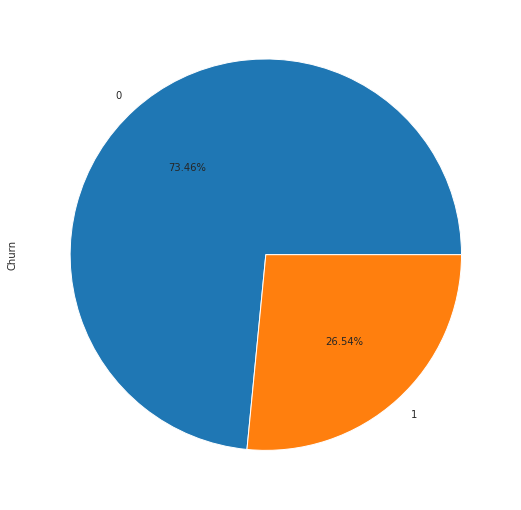

In [6]:
plt.figure(figsize=(16,9))
data['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%' )
#plt.axis('equal')

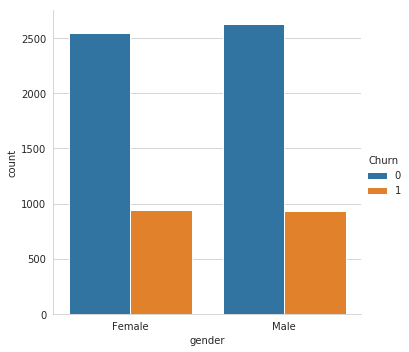

In [7]:
sns.catplot(x='gender', hue = 'Churn', data=data, kind='count', orient='h')

In [8]:
df = data.copy()


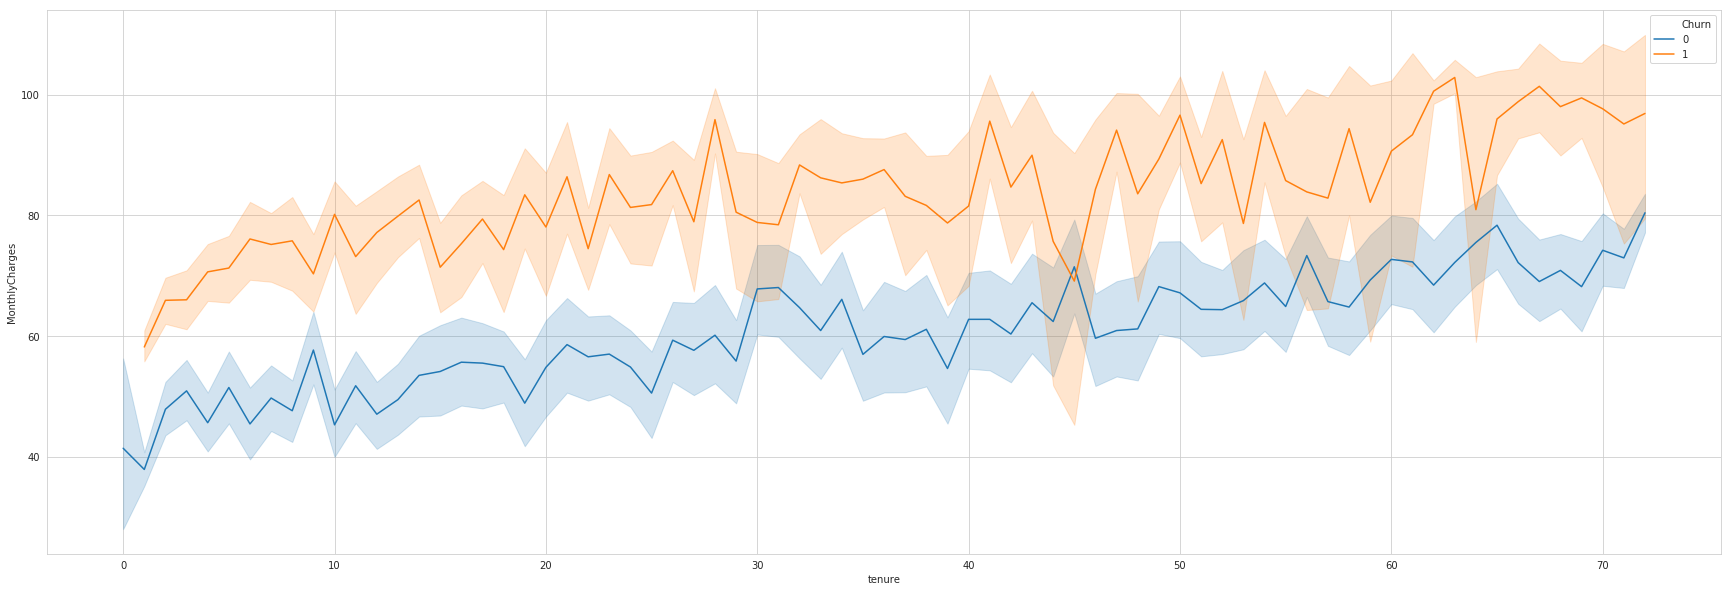

In [9]:
plt.figure(figsize=(30,10))
sns.lineplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)

In [10]:
#g = sns.FacetGrid(df, col = 'Churn', height = 5, aspect = 5)
#ax = g.map(sns.barplot,'tenure', 'MonthlyCharges', palette='Blues_d')

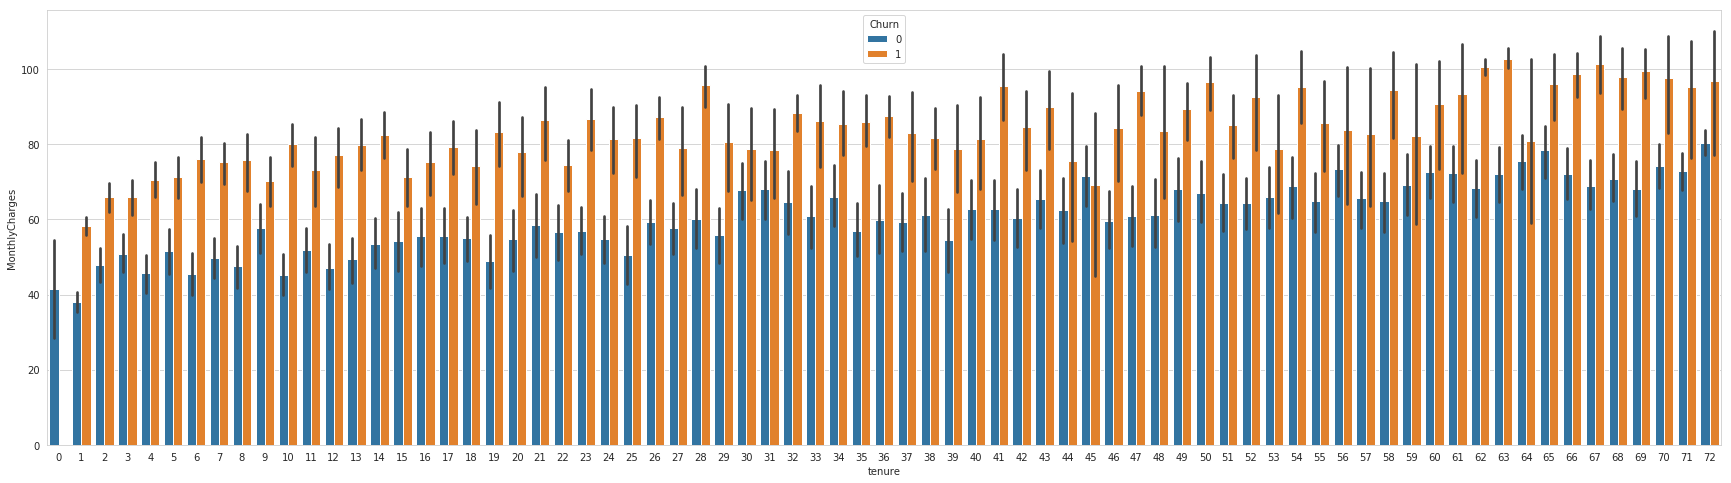

In [11]:
df_zero = df.loc[(data.Churn == 0), :]
plt.figure(figsize=(30,8))
sns.barplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)

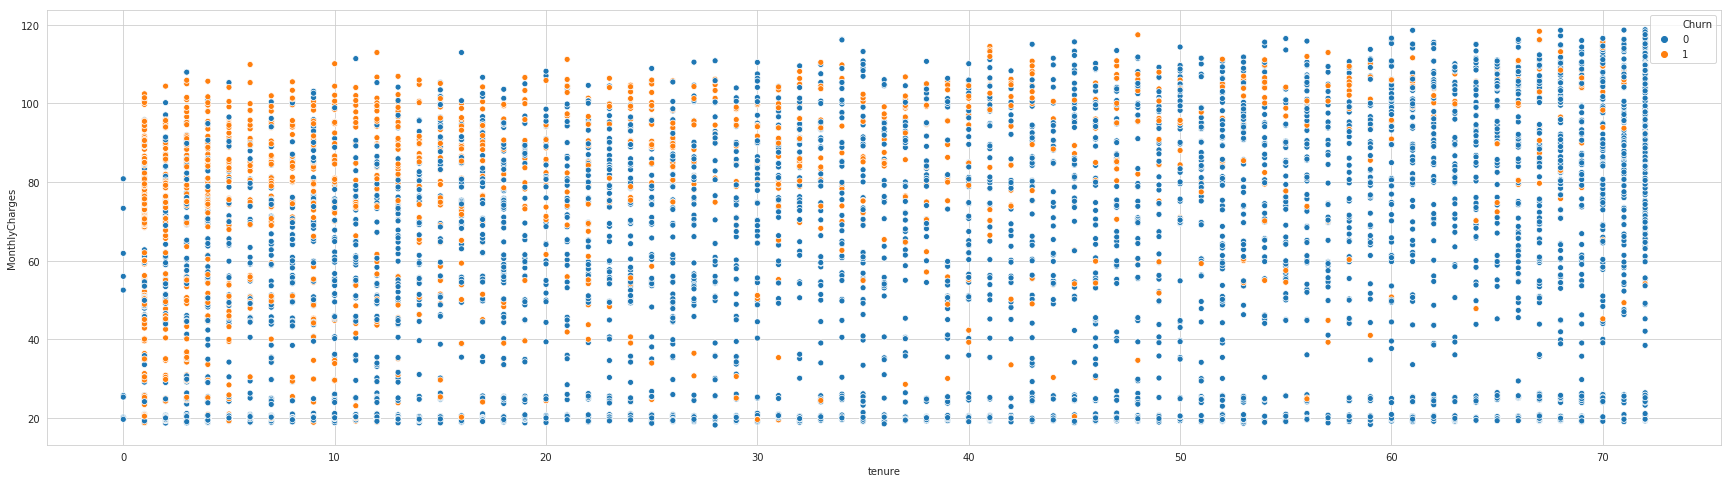

In [12]:
plt.figure(figsize=(30,8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)

In [13]:
#def cat_graphs(column):
   
 #   data[column].value_counts().plot(kind='pie', autopct='%.2f%%')
# plt.axis('equal');
    
  #  sns.catplot(x=column, hue='Churn', data=data, kind='count')

In [14]:
categoricals = [c for c in df.columns if df[c].dtype == 'object']
df_categoricals = df[categoricals].copy()
df_categoricals = df_categoricals.drop(columns='customerID', axis = 1)
df_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
dtypes: object(16)
memory usage: 880.5+ KB


In [15]:
for col in df_categoricals.columns:
    
    df_categoricals = pd.concat([df_categoricals, pd.get_dummies(df_categoricals[col], prefix = col)], axis = 1)
    df_categoricals = df_categoricals.drop(columns = col, axis = 1)

In [16]:
df_categoricals.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [17]:
numericals = [c for c in df.columns if df[c].dtypes == 'int64' or df[c].dtypes == 'float64' ]

df_numericals = df[numericals].copy()
df_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null float64
Churn             7043 non-null int64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [18]:
df = pd.concat([df_numericals, df_categoricals], axis = 1)

In [19]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [20]:
y = df['Churn']
x = df.drop(columns='Churn')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.linear_model import LogisticRegression

clf = RandomForestClassifier(n_estimators = 10000 ,max_features='sqrt', max_depth = 8, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))

Accuracy: 0.7984386089425124
Precision: 0.6642335766423357
Recall: 0.48663101604278075


In [22]:
# importando as bibliotecas dos modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# criando uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

# criando uma funçào para rodas o pipeline 
for clf in classifiers:
    
    # ajustando o modelo
    clf.fit(x_train, y_train)
    # armazenando o nome do modelo
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados
    print('****Results****')
    # fazendo predições
    # calculando as métricas
    y_pred = clf.predict(x_test)
    # imprimindo as métricas
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7544357700496807
Precision: 0.5424242424242425
Recall: 0.4786096256684492
GaussianNB
****Results****
Accuracy: 0.709013484740951
Precision: 0.47297297297297297
Recall: 0.8422459893048129


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 0.801277501774308
Precision: 0.6598639455782312
Recall: 0.5187165775401069
SVC
****Results****
Accuracy: 0.7345635202271115
Precision: 0.0
Recall: 0.0
DecisionTreeClassifier
****Results****
Accuracy: 0.7324343506032647
Precision: 0.49624060150375937
Recall: 0.5294117647058824


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
****Results****
Accuracy: 0.7934705464868701
Precision: 0.6426116838487973
Recall: 0.5
GradientBoostingClassifier
****Results****
Accuracy: 0.7991483321504613
Precision: 0.6542372881355932
Recall: 0.516042780748663


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {
             'criterion': ('gini', 'entropy'),
             'max_depth' : range(1,20,2),
             'min_samples_split': range(10, 500, 20)
             }

clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree, parameters, verbose=1)

clf.fit(x,y)



print('Best parameters:' + str(clf.best_params_))

print('****Results****')

y_pred = clf.predict(x_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 270}
****Results****
Accuracy: 0.8176011355571328
Precision: 0.7010309278350515
Recall: 0.5454545454545454


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  1.4min finished


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.linear_model import LogisticRegression

clf = RandomForestClassifier(n_estimators = 10000 , max_depth = 9, random_state=42, min_samples_split = 270)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))

Accuracy: 0.7970191625266146
Precision: 0.691304347826087
Recall: 0.42513368983957217


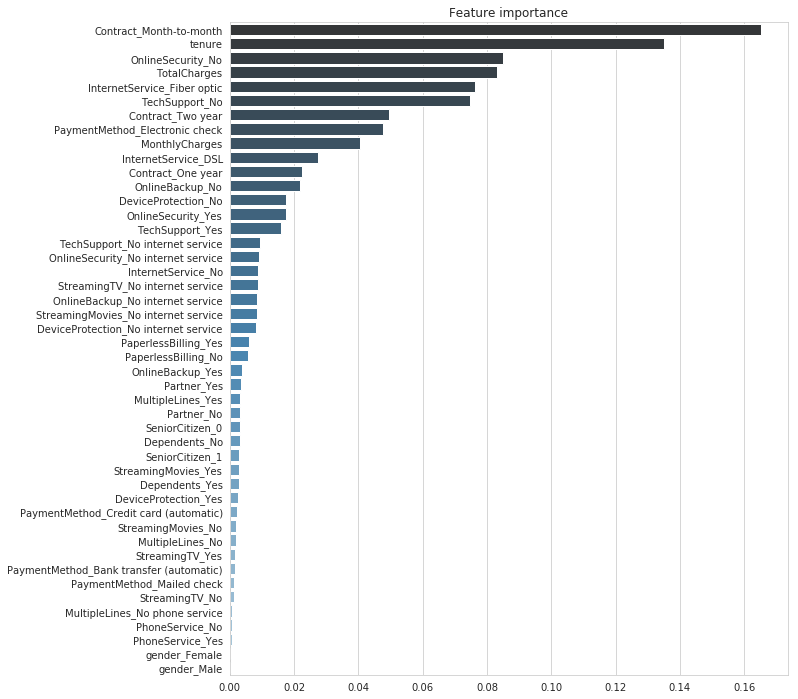

In [25]:
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')